# CHM210 Assignment 4: Chemistry of Natural Waters, II

Welcome to the fourth assignment for CHM210. We are going to use a <a href="https://jupyter4edu.github.io/jupyter-edu-book/">Jupyter notebook</a> with Python to investigate some properties of acid-base solubility in natural waters. All of your answers will be completed within this document (changes you make are saved into your personal https://utoronto.syzygy.ca account, so don't worry about editing this file). There are a lot of free, online resources out there to help you with Jupyter and Python. I recommend Christian Hill's <a href="https://scipython.com/book/">"Learning Scientific Programming with Python"</a>. The chemistry content of this assignment should follow your textbook and lecture notes (Chapter 10 in Baird and Cann, 5th edition). If you need to review acid-base equilibria fundamentals, the <a href="https://openstax.org/books/chemistry-2e/pages/14-introduction">openstax Chemistry 2e book</a> is a good, freely accessible online resource that you may want to refer to. 

After completing this assignment, you should be able to write down acid-base equilibrium constants, calculate pH, solubility, alkalinity, and aqueous concentrations for a given set of reactions at equilibrium with known equilibrium constants, apply Le Chatelier's Principle, and write and test functions in Python. 

First things first, we need to import the Python modules we will be using for this assignment. Press the "Run" button (or ctrl-enter) on the box below to import the packages we need. If done successfully, the "You have imported the above modules!" text will display below. 

In [1]:
# lines that start with a "#" character are comments
# Python doesn't read comments as code, but they are helpful for us, the readers and writers, so we can remember why we have written code a particular way
# the import statements are how we add the specific packages we want to use
# when we write "import YYYYYY as Y", we are creating a shortform "Y" that we can use to reference the package "YYYYYY"  
import matplotlib.pyplot as plt
import math as m
import numpy as np
import os

# to make the interactive plots
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
# below is a simple print statement that will appear as text when we run this box of code
# you can easily change what text prints here by editing the words between the ""
print("You have imported the above modules!")

You have imported the above modules!



## The carbonate system

Within chapter 10 of your textbook, pages 430-441 (5th edition) walk you through the carbonate system so you should make sure you've done the reading from this section.

The carbonate system (sometimes called the $CO_2$-bicarbonate-carbonate system) refers to the equilibria between aqueous $H_2CO_3$, $HCO_3^-$, and $CO_3^{2-}$:
<img src="http://individual.utoronto.ca/sck/CHM210/A4/eq1.png" alt = "carbonate equilibria">
Carbonic acid ($H_2CO_3$) in natural waters arises from the dissolution of carbon dioxide gas (which you thought about in the previous assignment).

# Q1. What are the two primary sources of $CO_2$ to natural waters? <i>(2 marks)</i>
# Answer to Q1.
***

Dissolved $CO_2$ primarily comes from atmospheric $CO_2$ or the decomposition of organic matter within the water.

***


# The pH of water

# Q2a. How much carbonic acid would you expect to find in pure water at equilibrium with the atmosphere, assuming an atmospheric mixing ratio of 415 ppm of $CO_2$? Assume we are at Standard Ambient Temperature and Pressure (ie. 1 atm, 298 K) <i>(2 marks)</i>
<img src="http://individual.utoronto.ca/sck/CHM210/A4/eq2.png" alt = "">

# Answer to Q2a.
***

In [2]:
K_CO2 = 3.38*10**(-2) # mole/L (Henry's Law Constant at 25C)
P_CO2 = 415/(1E6) # Partial Pressure of CO2 in atmospheres

T = 298
K_CO2 = 0.035*m.exp(2400*((1/T)-1/(298.15)))/1.01325

# Remember Henry's Law
C_H2CO3 = K_CO2*P_CO2
print("The concentration of aqueous carbon dioxide is ", round(C_H2CO3,6), "mole/L")

The concentration of aqueous carbon dioxide is  1.4e-05 mole/L


***
# Q2b. Write the expression for the acid dissociation constant for the first dissociation reaction of carbonic acid. <i>(1 mark)</i>
<img src="http://individual.utoronto.ca/sck/CHM210/A4/eq3.png" alt = "">

# Answer to Q2b.
***

$K_1=\frac{[H^+][HCO_{3}^{-}]}{[H_2CO_3]}$

***
# Q2c. If the effective number of protons in water is controlled by the first acid dissociation constant for carbonic acid, what is the pH of that water? <i>(1 mark)</i>

# Answer to Q2c.
***

In [3]:
K_A1 = 4.5*10**(-7) # Acid dissociation constant at 25C
C_H = m.sqrt(K_A1*C_H2CO3) # formula for effective concentration of protons

pH = -m.log10(C_H)
print("The pH of this water is ", round(pH,2))

The pH of this water is  5.59


# Q2d. Where in the environment would you expect to find water like this (ie. water with pH controlled by the first dissociation of carbonic acid)? Why? <i>(2 marks)</i>


# Answer to Q2d.
***

Rain water in remote environments is a good example of water whose pH is controlled by the first acid dissociation reaction of carbonic acid since it a pool of water at equilibrium with atmospheric $CO_2$ but not with solid $CaCO_3$. Other examples meeting this criteria are acceptable too. 

***
# Q2f. Why were we able to neglect the second acid dissociation constant in Q2c? <i>(1 mark)</i>
<img src="http://individual.utoronto.ca/sck/CHM210/A4/eq4.png" alt = "">

# Answer to Q2f.
***

Because $K_1$ >> $K_2$

***


# Run the widget below to generate a carbon species plot like the one found on page 431 of your text book to answer the following questions.

The temp_C control allows you to change the temperature of the system in degrees Celsius.

In [4]:
from chm210_4 import CarbonDiagram1
w = interactive(CarbonDiagram1, temp_C=(-50, 50))
display(w)

interactive(children=(IntSlider(value=25, description='temp_C', max=50, min=-50), Output()), _dom_classes=('wi…

# Q3a. Why does the plot change with temperature? ie. Think about what controls the fraction of each species present at equilibrium at a specific pH and what would cause that to be temperature dependent. <i>(2 marks)</i>

# Answer to Q3a.
***

The ratio of reactants:products is predicted by the equilibrium constants and equilibrium constants are dependent on temperature. For endothermic reactions (which the dissociation of weak acids typically are), adding temperature to the system moves the position of the equilibrium towards to products. 

The typical way to think about this is by applying Le Chatelier's principle where heat is treated as a reactant for endothermic processes (since they remove heat from the system. For exothermic reactions, so heat is considered a product). ie.


<img src="http://individual.utoronto.ca/sck/CHM210/A4/A4_sol_1.png" alt = "">

Raising the temperature (ie. adding more heat) moves our reaction to the right and lowering the temperature moves our reaction to the left. 

The <a href="https://openstax.org/books/chemistry-2e/pages/13-3-shifting-equilibria-le-chateliers-principle">openstax</a> chemistry text book reviews Le Chatelier's Principle for those who want it. 

***

# Q3b. If you wanted to conduct an experiment to <b>measure</b> the second acid dissociation constant for carbonic acid, what conditions (pH and temperature) would you run your experiment at and why? <i>(4 marks)</i>

If you want to measure the second acid dissociation constant for carbonic acid, you want a system where [$H^+$] is controlled by the second dissociation reaction and not the first.

The <a href="https://openstax.org/books/chemistry-2e/pages/14-6-buffers">Henderson-Hasselbalch equation</a> gives us a simple way to think about how pH, pKa, and the ratio of protonated/deprotonated forms of weak acids relate to each other. 

For,
<img src="http://individual.utoronto.ca/sck/CHM210/A4/A4_sol_2.png" alt = "">

$pH = pK_a + \log{\frac{[A^-]}{[HA]}}$

When the $pH$ we are working at equals to the $pK_a$ of our weak acid, we have equal amounts of the protonated and deprotonated form. We can visually look at the graph and see that at T = 25C, the $pK_{a1}$ for the R1 is around 6 and the $pK_{a2}$ for R2 is a little over 10. We want to work exclusively at pHs such that, for R1, $[HCO_3^-]$>>$[H_2CO_3]$. If we choose a 1000:1 ratio, that puts us $3pH$ unites away from the $pK_{a1}$, or at $pH ≥ 9$ for 25C. 

# The $CO_2$-Bicarbonate-Carbonate System

# Q4a. What is the primary source of carbonate ions ($CO_3^{2-}$) to natural waters? <i> (1 mark) </i>

# Answer to Q4a.
***

The primary source of carbonate ions to water waters is the weathering of limestone rocks ($CaCO_3$).

***
# Considering the following reactions in the $CO_2$-Bicarbonate-Carbonate system:
<img src="http://individual.utoronto.ca/sck/CHM210/A4/eq5.png" alt = "">

# Q4b. Write the net reaction <i>(1 mark)</i>

# Answer to Q4b.
***

<img src="http://individual.utoronto.ca/sck/CHM210/A4/A4_sol_3.png" alt = "">

#### ***

# Q4c. Write the equilibrium constant for your net reaction <i>(1 mark)</i>

# Answer Q4c.
***

$K_8 = K_{sp}K_bK_HK_1K_w^{-1}$

***

# Q4d. Explain why small crystals of $CaCO_3$ form in natural waters that have abundant activity of photosynthetic organisms. <i>(2 marks)</i>

# Answer to Q4d.
***

Photosynthetic organisms take $CO_2$ from the water. As we can see from the above, the less $CO_2$ available, the less soluble $CaCO_3$ will be. Previously dissolved $CaCO_3$ can precipitate out if dissolved $CO_2$ levels suddenly decrease due to biological activity.

***

# Q4e. Write a Python function that will calculate the temperature dependent equilibrium constant from Q4c (you will need to fill in the specified equation below) <i>(2 marks)</i>

# Answer Q4e.
***

In [5]:
def netK(T_C):
    T = T_C + 273.15
    K1 = 10**(-(3404.71/T + 0.032786*T - 14.8435)) #(Harned and Davis, 1943) 
    KH = 10**(-(-2622.38/T - 0.0178471*T + 15.5873))# (Harned and Davis, 1943) 
    Ksp = 10**(-171.945 - 0.077993*T + 2903.293/T + 71.595*m.log10(T)) # (Mucci, 1983)
    Kb = 2.1*10**(-4)
    Kw = m.exp(148.9802 - 13847.26/T - 23.6521*m.log(T)) #(Dickson and Riley, 1979)

    K8 = K1*KH*Kb*Ksp/Kw
    return K8

#test the function at 25 deg C and make sure it compares well to the one on page 440 of your textbook!
print(round(netK(25),8))

1.55e-06


***
# Q4f. Write a function to calculate the solublity of $CaCO_3$ as a function of temperature and partial pressure of $CO_2$ <i>(2 marks)</i>
# Answer Q4f.
***

In [6]:
def dissolvedCa(T_C, PCO2_ppm):
    K8 = netK(T_C)
    PCO2 = PCO2_ppm/(1E6) # Partial Pressure of CO2 in atmospheres
    
    return (K8*PCO2/4)**(1/3)

#test the function at 25 deg C and 390 ppm to make sure it compares well to the one on page 440 of your textbook!
print(round(dissolvedCa(25, 390),5))

0.00053


***
# If temperature is 14 deg. C and the partial pressure of $CO_2$ is 285 ppm, then the solubility of  $CaCO_3$ should now be easy to find by trying out your function.
***

In [7]:
T_C = 14
PCO2_ppm = 285
print("If T = ", T_C, "C and PCO2 = ", PCO2_ppm, "ppm, then solubility of CaCO3 = ", round(dissolvedCa(T_C, PCO2_ppm),5), "mol/L") 

If T =  14 C and PCO2 =  285 ppm, then solubility of CaCO3 =  0.00071 mol/L


***
# Q4g. Calculate the solubility of  $CaCO_3$ if temperature is 14 deg. C and the partial pressure of $CO_2$ is 415 ppm. <i>(1 mark)</i>

# Answer to Q4g.
***

In [8]:
T_C = 14
PCO2_ppm = 415
print("If T = ", T_C, "C and PCO2 = ", PCO2_ppm, "ppm, then solubility of CaCO3 = ", round(dissolvedCa(T_C, PCO2_ppm),5), "mol/L") 

If T =  14 C and PCO2 =  415 ppm, then solubility of CaCO3 =  0.00081 mol/L


***
# Q4h. Some projections for Earth's future climate suggest that in 2100, the global mean mixing ratio of $CO_2$ will be 900 ppm. Calculate the solubility of  $CaCO_3$ in this case. <i>(1 mark)</i>

# Answer to Q4h.
***

In [9]:
T_C = 14
PCO2_ppm =  900
print("If T = ", T_C, "C and PCO2 = ", PCO2_ppm, "ppm, then solubility of CaCO3 = ", round(dissolvedCa(T_C, PCO2_ppm),5), "mol/L") 

If T =  14 C and PCO2 =  900 ppm, then solubility of CaCO3 =  0.00104 mol/L


***
# Q4i. What consequences would this change in solubility have for marine organisms? <i>(1 mark)</i>

# Answer to Q4i.
***

Increasing atmospheric $CO_2$ increases the solubility of $CaCO_3$. Marine organisms that have shells/exoskeletons made of $CaCO_3$ will be less protected, as they're shells/exoskeletons will be thinner (because they dissolve).

***
# Q4j. Write a function to calculate the pH of natural water at equilibrium with atmospheric $CO_2$ and limestone as a function of temperature and partial pressure of $CO_2$ <i>(4 marks)</i>
# Answer Q4j.
***

In [10]:
def pH(T_C, PCO2_ppm):
    T = T_C + 273.15
    Ksp = 10**(-171.945 - 0.077993*T + 2903.293/T + 71.595*m.log10(T)) # (Mucci, 1983)
    Kb = 2.1*10**(-4)
    Kw = m.exp(148.9802 - 13847.26/T - 23.6521*m.log(T)) #(Dickson and Riley, 1979)
    
    S = dissolvedCa(T_C, PCO2_ppm)
    HCO3 = 2*S
    CO3 = Ksp/S
    OH=Kb*CO3/HCO3
    H=Kw/OH
    return -m.log10(H)

***
# If temperature is 14 deg. C and the partial pressure of $CO_2$ is 285 ppm, then the pH should now be easy to find by trying our your function.
***

In [11]:
T_C = 14
PCO2_ppm = 285
print("If T = ", T_C, "C and PCO2 = ", PCO2_ppm, "ppm, then pH = ", round(pH(T_C, PCO2_ppm),2))

If T =  14 C and PCO2 =  285 ppm, then pH =  8.46


***
# Q4k. Calculate the pH if temperature is 14 deg. C and the partial pressure of $CO_2$ is 415 ppm. <i>(1 mark)</i>

# Answer to Q4k.
***

In [12]:
T_C = 14
PCO2_ppm = 415
print("If T = ", T_C, "C and PCO2 = ", PCO2_ppm, "ppm, then pH = ", round(pH(T_C, PCO2_ppm),2))

If T =  14 C and PCO2 =  415 ppm, then pH =  8.35


# Now we will look at what happens to natural waters over the course of the day. Run the below code to import some atmospheric $CO_2$ mixing ratios and water temperature data. Your pH function needs to work for the plot to be generated.

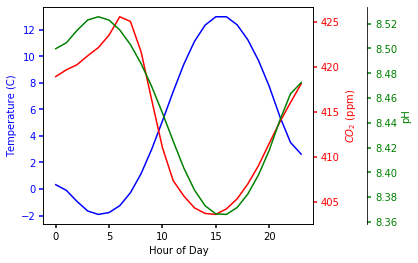

In [13]:
# download .txt file containing CO2 mixing ratios in ppm
CO2 = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/A4/DV_CO2.txt")
# download .txt file containing temperature in degrees C
Temp_C = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/A4/Temp.txt")
# download .txt file that contains hours of the day to help plot the data
HOD = np.loadtxt(fname = "http://individual.utoronto.ca/sck/CHM210/A4/HOD.txt")

#if your function works as intended, this is create an array with pH values
pH_f = [pH(Temp_C[i], CO2[i]) for i in range(0,len(CO2))]

# this will allow you to create a plot will all three curves on one graph
# plot inputs are hour of day, temperature, atmospheric CO2 mixing ratios, and water pH
from chm210_4 import Plot_A4
Plot_A4(HOD, Temp_C, CO2, pH_f)

##################################################
# if your pH function does not work, you can plot temperature and CO2 on their own to answer Q5 with the below code 
# you will need to remove the comments from the below two lines for it to run if you need them
#from chm210_4 import Plot_A4_2
#Plot_A4_2(HOD, Temp_C, CO2)

# Q5. What time of day would you expect to find the largest amount of solid  $CaCO_3$ and why? <i>(3 marks)</i>

You would expect to find the largest amount of solid $CaCO_3$ when <b>solubility</b> is lowest which occurs when <b>$CO_2$ is at its minimum</b>, which occurs in this example around 15:00 (3pm). This is consistent with our net reaction,
<img src="http://individual.utoronto.ca/sck/CHM210/A4/A4_sol_3.png" alt = "">
Solubility of $CaCO_3$ is being driven by $CO_2$.

If you look at the below figure, you can see that solubility is govered by $CO_2$ mixing ratio and that temperature dependence is a minor factor.

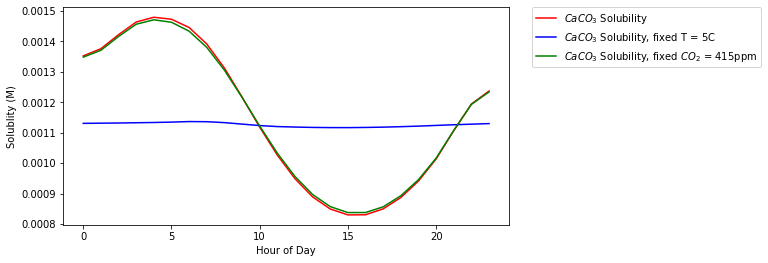

In [32]:
solubility = [dissolvedCa(Temp_C[i], CO2[i]) for i in range(0,len(CO2))]
sol_constanttemp = [dissolvedCa(5, CO2[i]) for i in range(0,len(CO2))]
sol_constantCO2 = [dissolvedCa(Temp_C[i], 415) for i in range(0,len(CO2))]
fig, sol = plt.subplots(1, 1, figsize=(8, 4))
sol.plot(HOD, solubility, 'r-', label='$CaCO_3$ Solubility')
sol.plot(HOD, sol_constanttemp, 'b-', label='$CaCO_3$ Solubility, fixed T = 5C')
sol.plot(HOD, sol_constantCO2, 'g-', label='$CaCO_3$ Solubility, fixed $CO_2$ = 415ppm')
sol.set_xlabel("Hour of Day")
sol.set_ylabel("Solublity (M)")
sol.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

***
# Q6a. Calculate the total alkalinity of the system described in Q4k. <i>(4 marks)</i>

# Answer to Q6a.
***

In [15]:
def alkalinity_uM(T_C, PCO2_ppm):
    T = T_C + 273.15
    Ksp = 10**(-171.945 - 0.077993*T + 2903.293/T + 71.595*m.log10(T)) # (Mucci, 1983)
    Kb = 2.1*10**(-4)
    Kw = m.exp(148.9802 - 13847.26/T - 23.6521*m.log(T)) #(Dickson and Riley, 1979)
    
    S = dissolvedCa(T_C, PCO2_ppm)
    HCO3 = 2*S
    CO3 = Ksp/S
    OH=Kb*CO3/HCO3
    H=Kw/OH
    return (2*CO3 + HCO3 + OH - H)*10**(6)
print(round(alkalinity_uM(14, 415),3),"μM")

1628.054 μM


***
# Q6b. What does the alkalinity you calculated above tell us about the sensitivity of that body of water to acid rain? Why?<i>(2 marks)</i>

# Answer to Q6b.
***

This is a high alkalinity value which means that this body of water has low sensitivity to acid rain (page 446 of your text book discusses the low/high sensitivity language). This means that this body of water has a large capacity to neutralize acids.